In [3]:
from google.colab import files
uploaded = files.upload()


Saving house.csv to house (2).csv


Saving house.csv to house (4).csv
Shape: (21613, 21)

First 5 rows:
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680  

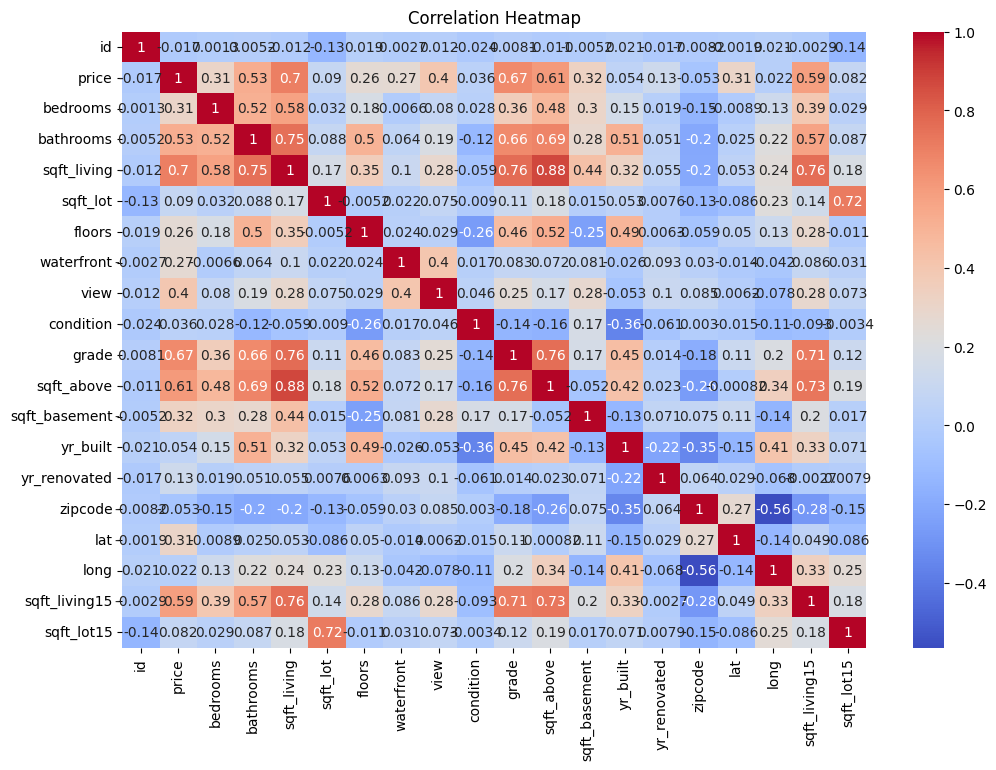


Model Evaluation Metrics:
MAE (Mean Absolute Error): 127610.70272608323
MSE (Mean Squared Error): 45224874244.7258
RMSE (Root Mean Squared Error): 212661.40751139075


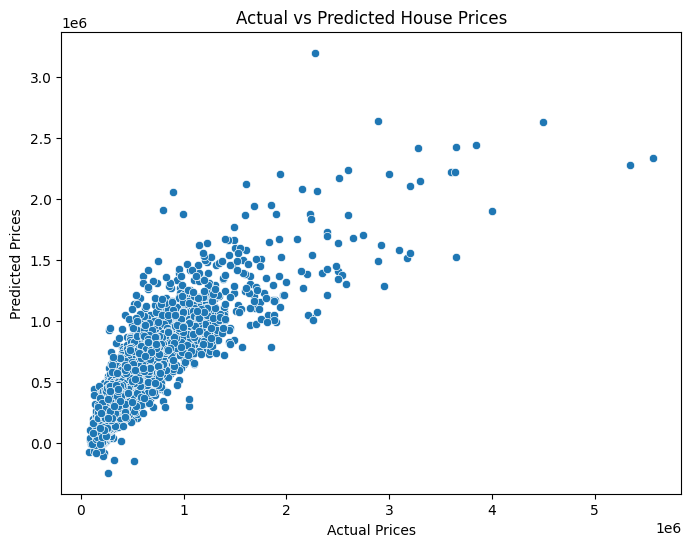


Final Insights:
- Linear Regression MAE: 127610.70
- RMSE: 212661.41
- The model captures general price trends but may be improved with advanced models (e.g., Random Forest).


In [5]:
# TASK 6: House Price Prediction

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Upload CSV (House price dataset)
from google.colab import files
uploaded = files.upload()

# Load CSV file
df = pd.read_csv('house.csv')

# Basic EDA
print("Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nData Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Correlation heatmap — only numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Target column: 'price'
# Feature columns — drop 'id', 'date' if present
X = df.drop(['price', 'id', 'date'], axis=1, errors='ignore')
y = df['price']

# For categorical columns — convert to numeric (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

print("\nModel Evaluation Metrics:")
print("MAE (Mean Absolute Error):", mae)
print("MSE (Mean Squared Error):", mse)
print("RMSE (Root Mean Squared Error):", rmse)

# Scatter Plot: Actual vs Predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Final Insights
print("\nFinal Insights:")
print(f"- Linear Regression MAE: {mae:.2f}")
print(f"- RMSE: {rmse:.2f}")
print("- The model captures general price trends but may be improved with advanced models (e.g., Random Forest).")
